<a href="https://colab.research.google.com/github/AdrianSFz/Python/blob/main/Analizador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduce el nombre de la acción (ticker): iwm
Introduce el año (YYYY): 2020


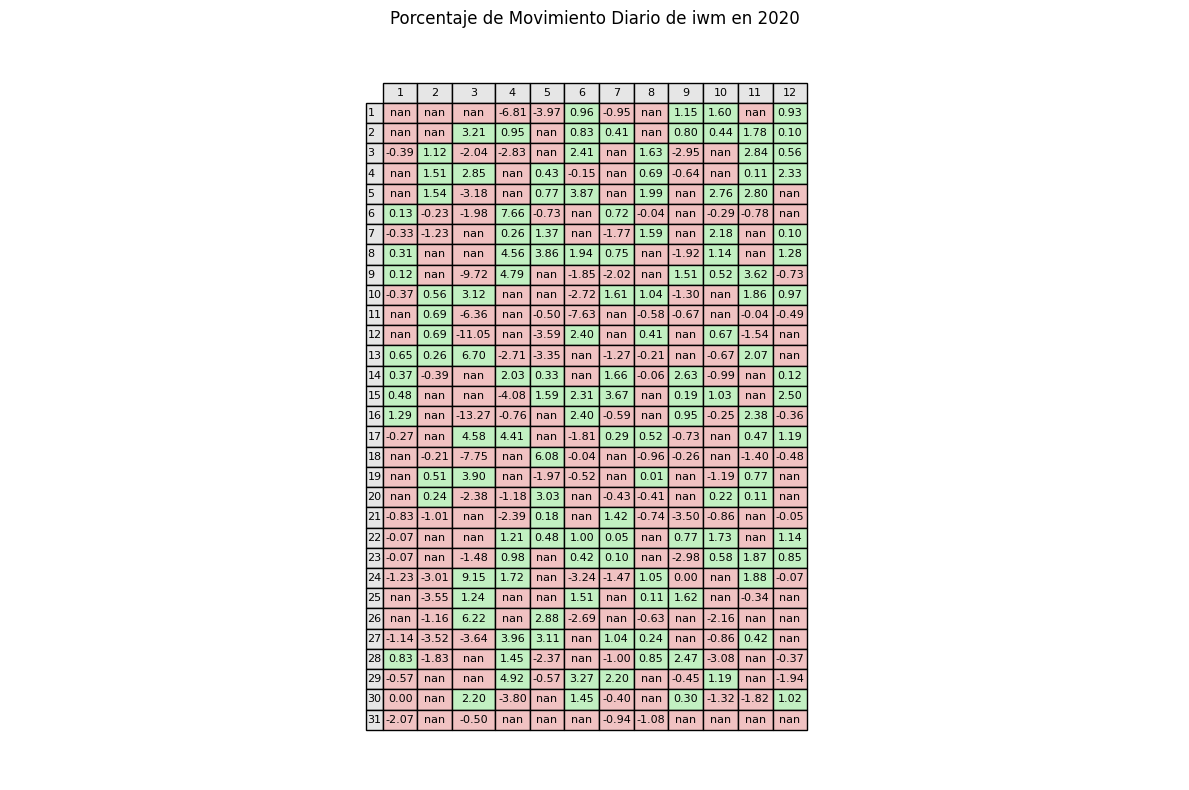


Análisis para iwm:
PE Ratio: N/A
EPS: N/A
Market Cap: N/A
Book Value: N/A
Cash per Share: N/A
Current Ratio: N/A
Quick Ratio: N/A
Profit Margin: N/A
Operating Margin: N/A
Beta: N/A
Dividend Yield: N/A
Return on Equity: N/A
Sales: N/A
Revenue Growth: N/A
Conclusion: La empresa parece estar en una posición financiera sólida basada en los datos disponibles.


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analyze_stock(ticker, year):
    try:
        # Obtiene los datos de la acción
        stock = yf.Ticker(ticker)
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        history = stock.history(start=start_date, end=end_date)
        info = stock.info

        # Calcular el cambio porcentual diario
        history['Daily Change (%)'] = history['Close'].pct_change() * 100

        # Redondear los valores a dos decimales
        history['Daily Change (%)'] = history['Daily Change (%)'].round(2)

        # Crear tabla de movimientos porcentuales
        history['Day'] = history.index.day
        history['Month'] = history.index.month
        table_data = history.pivot(index='Day', columns='Month', values='Daily Change (%)')

        # Crear gráfico de la tabla
        fig, ax = plt.subplots(figsize=(12, 8))  # Reducido tamaño de gráfico

        # Crear una matriz para los colores de fondo
        colors = np.where(table_data > 0, '#c2f0c2', '#f0c2c2')  # Colores más claros

        # Crear tabla en el gráfico
        table = ax.table(cellText=table_data.values,
                         cellColours=colors,
                         rowLabels=table_data.index,
                         colLabels=table_data.columns,
                         loc='center',
                         cellLoc='center',
                         rowColours=['#e6e6e6'] * len(table_data.index),
                         colColours=['#e6e6e6'] * len(table_data.columns))

        # Ajustar el tamaño de la tabla
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.auto_set_column_width(col=[i for i in range(len(table_data.columns))])

        # Ajustar los textos en las celdas
        for i, (row, col) in enumerate(np.ndindex(table_data.shape)):
            value = f'{table_data.iloc[row, col]:.2f}'
            cell = table[(row + 1, col)]
            cell.get_text().set_text(value)

        # Ajustar el gráfico
        ax.axis('off')
        plt.title(f'Porcentaje de Movimiento Diario de {ticker} en {year}')
        plt.tight_layout()

        # Mostrar gráfico
        plt.show()

        # Evaluar la viabilidad de la inversión
        conclusion = []

        # P/E Ratio
        if 'forwardEps' in info and info['forwardEps'] != 'N/A' and float(info['forwardEps']) > 50:
            conclusion.append("La valoración es alta, lo que podría indicar que la acción está sobrevalorada.")

        # Profit Margin
        if 'profitMargins' in info and info['profitMargins'] != 'N/A' and float(info['profitMargins']) < 0.1:
            conclusion.append("El margen de beneficio es bajo, lo que podría ser una señal de desafíos en rentabilidad.")

        # Current Ratio
        if 'currentRatio' in info and info['currentRatio'] != 'N/A' and float(info['currentRatio']) < 1:
            conclusion.append("La empresa podría tener problemas de liquidez a corto plazo.")

        # Quick Ratio
        if 'quickRatio' in info and info['quickRatio'] != 'N/A' and float(info['quickRatio']) < 1:
            conclusion.append("La empresa podría enfrentar dificultades en su capacidad para cubrir obligaciones inmediatas.")

        # Debt-to-Equity Ratio
        if 'debtToEquity' in info and info['debtToEquity'] > 100:
            conclusion.append("La empresa tiene un alto nivel de deuda en comparación con su capital, lo que podría indicar riesgos financieros.")

        # Gross Margin
        if 'operatingMargins' in info and info['operatingMargins'] != 'N/A' and float(info['operatingMargins']) < 0.1:
            conclusion.append("El margen operativo es bajo, lo que puede ser un indicador de ineficiencia en la operación.")

        # ROA
        if 'returnOnEquity' in info and info['returnOnEquity'] != 'N/A' and float(info['returnOnEquity']) < 0.1:
            conclusion.append("El retorno sobre el capital es bajo, lo que puede sugerir una baja eficiencia en la generación de beneficios.")

        # Revenue Growth
        if 'revenueGrowth' in info and info['revenueGrowth'] != 'N/A' and float(info['revenueGrowth']) < 0.1:
            conclusion.append("El crecimiento de los ingresos es bajo, lo que podría indicar problemas en la expansión.")

        # Beta
        if 'beta' in info and info['beta'] != 'N/A' and float(info['beta']) > 1.5:
            conclusion.append("La acción es bastante volátil en comparación con el mercado general.")

        if not conclusion:
            conclusion.append("La empresa parece estar en una posición financiera sólida basada en los datos disponibles.")

        return {
            'PE Ratio': info.get('forwardEps', 'N/A'),
            'EPS': info.get('trailingEps', 'N/A'),
            'Market Cap': info.get('marketCap', 'N/A'),
            'Book Value': info.get('bookValue', 'N/A'),
            'Cash per Share': info.get('cashPerShare', 'N/A'),
            'Current Ratio': info.get('currentRatio', 'N/A'),
            'Quick Ratio': info.get('quickRatio', 'N/A'),
            'Profit Margin': info.get('profitMargins', 'N/A'),
            'Operating Margin': info.get('operatingMargins', 'N/A'),
            'Beta': info.get('beta', 'N/A'),
            'Dividend Yield': info.get('dividendYield', 'N/A'),
            'Return on Equity': info.get('returnOnEquity', 'N/A'),
            'Sales': info.get('totalRevenue', 'N/A'),
            'Revenue Growth': info.get('revenueGrowth', 'N/A'),
            'Conclusion': "\n".join(conclusion)
        }
    except Exception as e:
        return {'Error': str(e)}

def print_analysis(ticker, year):
    analysis = analyze_stock(ticker, year)
    print(f"\nAnálisis para {ticker}:")
    for key, value in analysis.items():
        print(f"{key}: {value}")

if __name__ == "__main__":
    ticker = input("Introduce el nombre de la acción (ticker): ")
    year = input("Introduce el año (YYYY): ")
    print_analysis(ticker, year)
